## Prueba Tecnica: Mineria de contrastes

### Descripcion del proyecto 

El proyecto consiste en implementar un flujo de mineria de datos sobre un conjunto de datos con informacion salarial de una orgalizacion. 

Para este proyecto haremos uso de la tecnica llamada `Mineria de contrastes (Contrast Set Mining, CSM), esta es una tecnica de mineria de datos con el proposito de encontrar conjuntos de caracteristicas que señalen diferencias significativas entre grupos. 


### A lo largo del proyecto se resolveran las sigueintes cuestiones:


- Cuales son las caracteristicas de los datos con las que trabajaremos.
  
- Cuales son los departamentos con mas colaboradores.

- La distribucion de generos , edades, sueldos y bonos.

- El contraste entre le sueldo y las demas caracteristicas. 
  
- Se analizara a relacion que tengan las distintas variables.

- Se probaran hipotesis sobre las medias salariales en diferentes situaciones como hombres vs mujeres y managers vs el resto de los puestos. 


#### Descripcion de los datos

##### Caracteristicas

- `JobTitle`: El puesto al cual pertenece.

- `Gender`: Sexo.

- `Age`: Edad.

- `PerfEval`: Rendimiento de evaluacion del 1 al 5 donde 1 es el minimo y 5 es el maximo. 

- `Edu`: Nivel de educacion.

- `Dept`: Area / Departamento de trabajo.

- `Seniority`: antigüedad / Maestria del puesto.
  
- `BasePay`: Sueldo base.

- `Bonus`: Bonos de salario. 


#### Importamos librerias.

Vamos principalmente a utilizar:
- `pandas` para la manipulacion de datos.
  
- `seaborn` para la creacion de graficos y `matplotlib` para complemetar los graficos. 
- `scipy` para realizar test de hipotesis.

In [1]:
### importamos librerias

import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


#### Carga de datos 

tenemos solamente un dataset descrito anteriormente el cual tenemos en el mismo proyecto en formato CSV.



In [2]:
# carga de datos

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('datasets/data.csv')
    

#### Exploracion inicial de datos

Esta exploracion nos ayuda a darnos una idea inicial de:

- Las columnas que tenemos
  
- Observar el tipo de infromacion que contiene
- El tipo de datos que contiene
- Si es que tenemos valores ausentes
- Detectar valores atipicos de manera rapida

In [3]:
### exploracion inicial de datos

print(data.head())
print()
print(data.info())
print()
print(data.describe())

              jobTitle  gender  age  perfEval      edu            dept  \
0     Graphic Designer  Female   18         5  College      Operations   
1    Software Engineer    Male   21         5  College      Management   
2  Warehouse Associate  Female   19         4      PhD  Administration   
3    Software Engineer    Male   20         5  Masters           Sales   
4     Graphic Designer    Male   26         5  Masters     Engineering   

   seniority  basePay  bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jobTitle   1000 non-null   object
 1   gender     1000 non-null   object
 2   age        1000 non-null   int64 
 3   perfEval   1000 non-null   int64 
 4   edu        1000 non-null

##### Conclusiones exploracion incial. 

- No tenemos valores ausentes los cuales deban ser tratados
  
- Todos los tipos de datos hacen sentido al nombre e la columna y su contenido 

Respecto a las siguentes columnas:
  
- `Age`: tenemos valores maximo y minimos logicos que van de `18` a `65` 
  
- `perfEval` y `seniority` se mantiene en el rango de `1` a `5` ya que son las unicas calificaciones existentes
  
- `basePay` y `bonus` hacen sentido a los sueldos de las profesiones mencioandas.

#### Feature Engineering

Vamos a crear tres nuevas columnas debido a que debemos volver categoricas las variables lineales como `age` y `basePay` / `bonus` , adicional nos aportara otra perspectiva de los datos.

- `total_salary`  la cual sera la suma de `basePay` y `bonus` 

- `total_salary_range` es la agrupacion de `total_salary` para volver categorica una variable continua.

- `age_group` es la agrupacion de `age` para volver categorica una variable continua.

De igual modo renombraremos las columnas para aplicar mejores practicas de codigo como:

- Separar las palabras con un "_" 

- Convertir todas las letras a minusculas

In [4]:
### renombramos las columnas 

data = data.rename(columns={'jobTitle':'job_title','perfEval':'perf_eval','basePay':'base_pay'})

In [5]:
data['total_salary'] = data['base_pay'] + data['bonus']

In [6]:
### rendimiento relativo 

In [7]:
## creacion de grupos para la exploracion de datos

# función que calcule la categoría de edad
def assing_age_range(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 20:
        return '< 19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    elif age >= 60:
        return '> 60'


In [8]:
# función que calcule la categoría de ingresos

def total_salary_range(salary):
    if salary < 40000 or pd.isna(salary):
        return '< 40,000'
    elif salary < 80001:
        return '40,000-80,000'
    elif salary < 120001:
        return '80,001-120,000'
    elif salary < 160001:
        return '120,001-160,000'
    elif salary >= 160001:
        return '> 160,000'

In [9]:

data['total_salary_range'] = data['total_salary'].apply(total_salary_range)
data['age_group'] = data['age'].apply(assing_age_range)

# exploramos las nuevas columnas 
data.head()


,job_title,gender,age,perf_eval,edu,dept,seniority,base_pay,bonus,total_salary,total_salary_range,age_group
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,"40,000-80,000",< 19
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,"80,001-120,000",20-39
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,"80,001-120,000",< 19
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,"80,001-120,000",20-39
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,"80,001-120,000",20-39


### Analisis exploratorio de datos

Esta seccion se dividira en tres partes

1. Establecimiento de `variables` como los colores que se utilizaran asi como la creacion de `funciones` para hacer un reporte con mejor codigo, mas limpio.
   
2. Exploracion de datos `univariado`, en el cual se explorara cada variable individaualmente.
3. Exploracion de datos `bivariado`, en el cual se exporaran variables contrastandolas con otras variables.
4. Exploracion de `relacion entre variables`, lo cual nos dara una idea del comportamiento de los colaboradores en la institucion.

#### Establecimiento de variables y funciones.

In [10]:
## establecemos paletas de colores a usar

paleta = ['#a1c9f4', '#ffffff', '#ffb482']
contraste=['#a1c9f4','#ffb482']

In [11]:
###  Funcion para grafico de barras

def barras(columna,color):
    df = data[columna].value_counts().reset_index()
    df.columns = [columna, 'colaboradores']

    # Configuramos el gráfico de barras
    ax = sns.barplot(x=columna, y='colaboradores', data=df, edgecolor='black', palette=color)

    # Agregamos el conteo en cada barra
    for index, row in df.iterrows():
        ax.text(index, row['colaboradores'], row['colaboradores'], ha='center', va='bottom')

    # Configuramos los ejes y el título
    plt.xlabel(f"{columna}")
    plt.ylabel("Cantidad de colaboradores")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(f"Cantidad de colaboradores por {columna}")

    # Mostramos el gráfico
    plt.show()

In [12]:
### Funcion para boxplot

def boxp(columnax,columnay,color):
    boxprops = {'edgecolor': 'black', 'linewidth': 1.5}

    fig, ax = plt.subplots(figsize=(7, 5))

    sns.boxplot(x=columnax, y=columnay, data=data, palette=color, boxprops=boxprops)

    plt.xlabel(f"{columnax}")
    plt.ylabel("Salario")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(f"Rango de salario por {columnax}")
    plt.show()

#### Exploracion de datos univariable 

##### Caracteristicas principales de los `roles de trabajo`

Podemos observar uniformidad entre los roles de la empresa en un rango de `90` a `118` colaboradores donde.

Asi como podriamos concluir que por las caracteriticas de los puestos esta es una empresa que vende algun producto el cual debe ser almacenado y enviado pero con un gran enfoque a lo tecnologico por la gran cantidad de puestos como `ingeniero de software` y `data scientist` , muy probablemente se trata de un `E-commerce`.

Otros datos a destacar:

- Titulo con mas colaboradores: `Marketing Associate`
  
- Titulo con menos colaboradores: `Manager` 


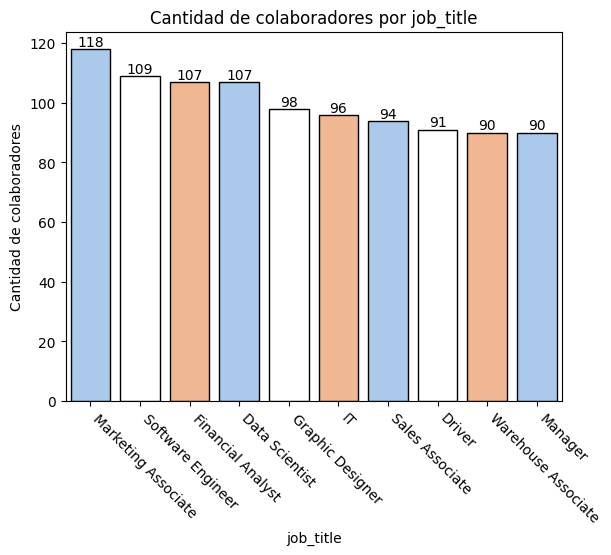

In [13]:
barras('job_title',paleta)

##### Caracteristicas principales de la distribucion de `generos` en al empresa.

Podemos observar uniformidad entre los generos de la empresa con una variacion de `64` colaboradores entre grupos, por lo cual se consideraria `balanceado`.

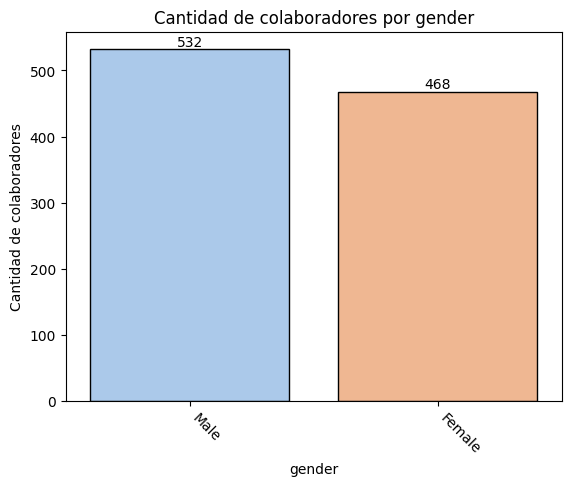

In [14]:
barras('gender',contraste)

##### Caracteristicas principales de las `edades`

Podemos observar uniformidad entre las edades en la empresa con picos alrededor de `18`, `33`, `37`, `48` y `62` años.

Asi como podriamos destacar valles en `26`, `35` y `49` años. 

Otros datos a destacar:

- Edad minima: `18 años`
  
- Mediana de edad: `41 años` 

- Edad maxima: `65 años`

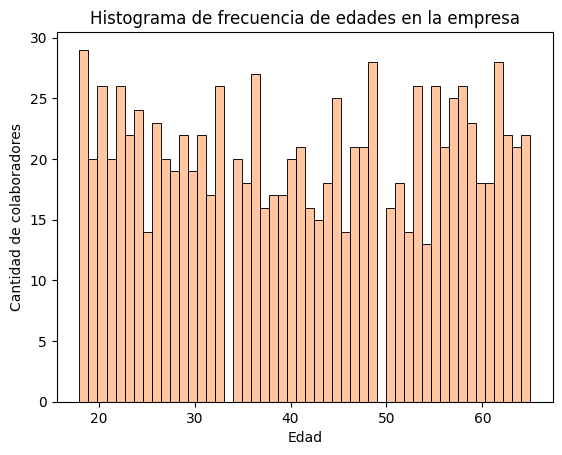

In [15]:
(
    sns.histplot(data=data['age'], bins=50, color='#ffb482')
    .set(title='Histograma de frecuencia de edades en la empresa', 
            xlabel='Edad', 
            ylabel='Cantidad de colaboradores')
)
plt.show()

##### Caracteristicas principales de los `sueldos base` y `bonos anuales`. 

Podemos observar una `distribucion normal` para ambos conjuntos de datos aunque ligeramente mas distribuidos en los `bonos`. 

Los rangos en los que se encuentran los sueldos base es de `$34,208` a `$17,9726` y los bonos se encontrarian en un rango de `$1,703` a `$11293`.

Otros datos a destacar:

- La mayoria de `salarios base` se encecuentra distribuido alrededor de `$80,000` y `100,000` USD
  
- La mayoria de `bonos` se encecuentra distribuido alrededor de `$4,000` y `$9,000` USD


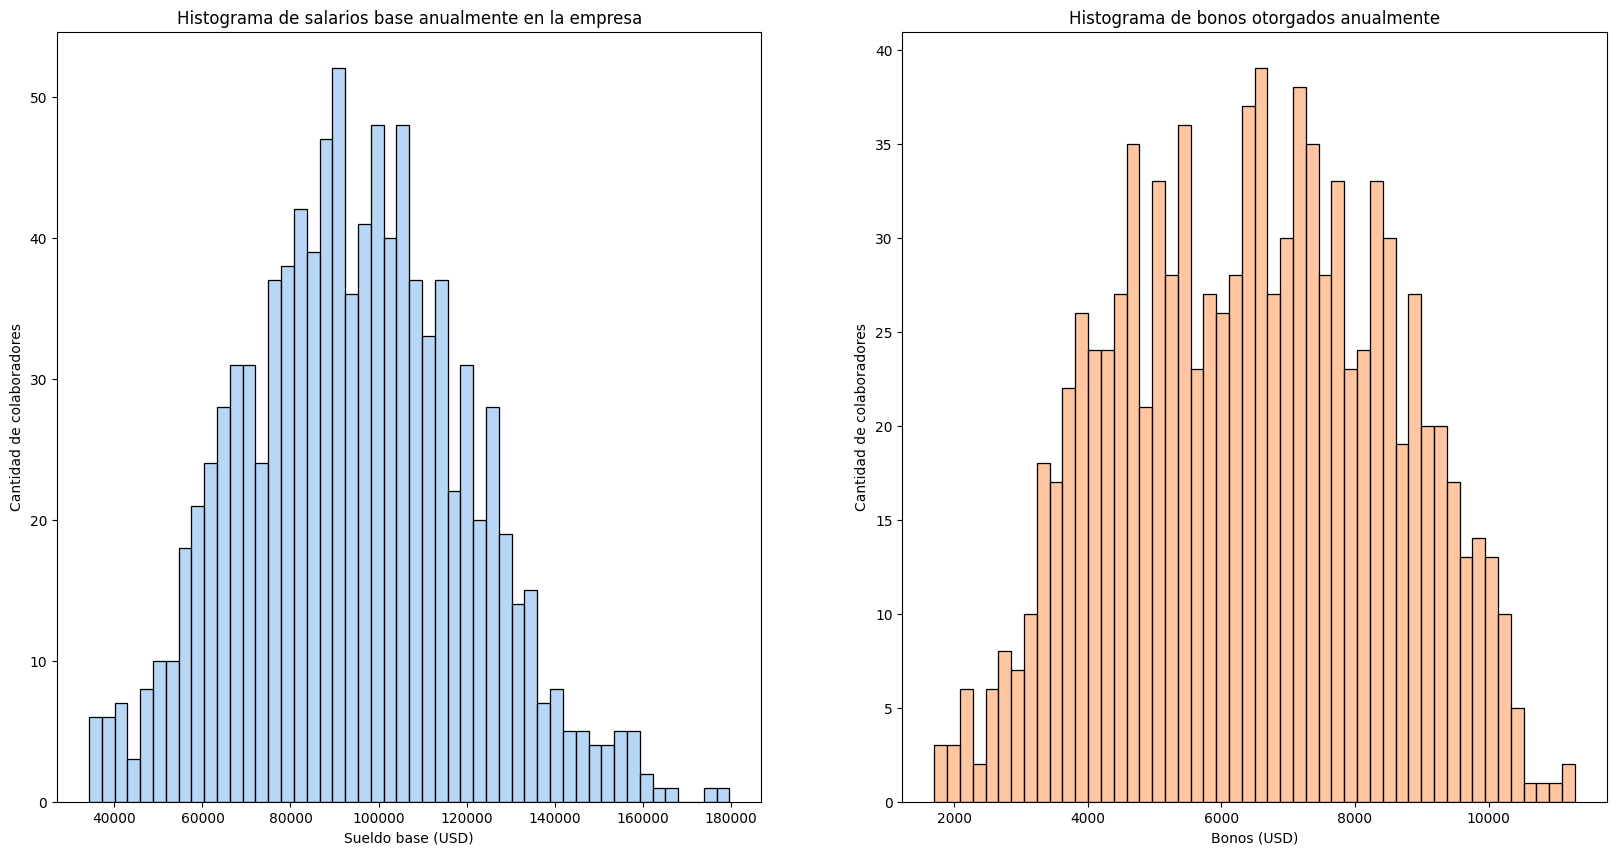

In [16]:
# subplots para salarios y bonos

fig, axes = plt.subplots(1, 2, figsize=(20,10))

# plotear el histograma en cada subplot
sns.histplot(ax=axes[0], data=data['base_pay'], bins=50, color='#a1c9f4')
sns.histplot(ax=axes[1], data=data['bonus'], bins=50, color='#ffb482')

# configurar los detalles de los subplots
axes[0].set(title='Histograma de salarios base anualmente en la empresa', xlabel='Sueldo base (USD)', ylabel='Cantidad de colaboradores')
axes[1].set(title='Histograma de bonos otorgados anualmente', xlabel='Bonos (USD)', ylabel='Cantidad de colaboradores')

# ajustar la distancia entre los subplots
#plt.tight_layout()

# mostrar los subplots
plt.show()


##### Caracteristicas principales de los `desempeño de evaluacion` y `seniority`. 

Podemos observar una `uniformidad` para ambos conjuntos de datos.

Para la nota de evaluacion podemos destacar:

- La mayoria de resultados se muestran en las calificaciones 4 y 5 lo que nos dice que la empresa tiene un buen desempleño en general por parte de los colaboradores
  

Para la etiqueta de seniority:

- La `mayoria` de colaboradores se encuentran en un nivel `mid/medio`.
  
- La `menor` parte de colaboradores se encuentrane un nivel `semi senior` y hay un poco mas en un `nivel senior`.

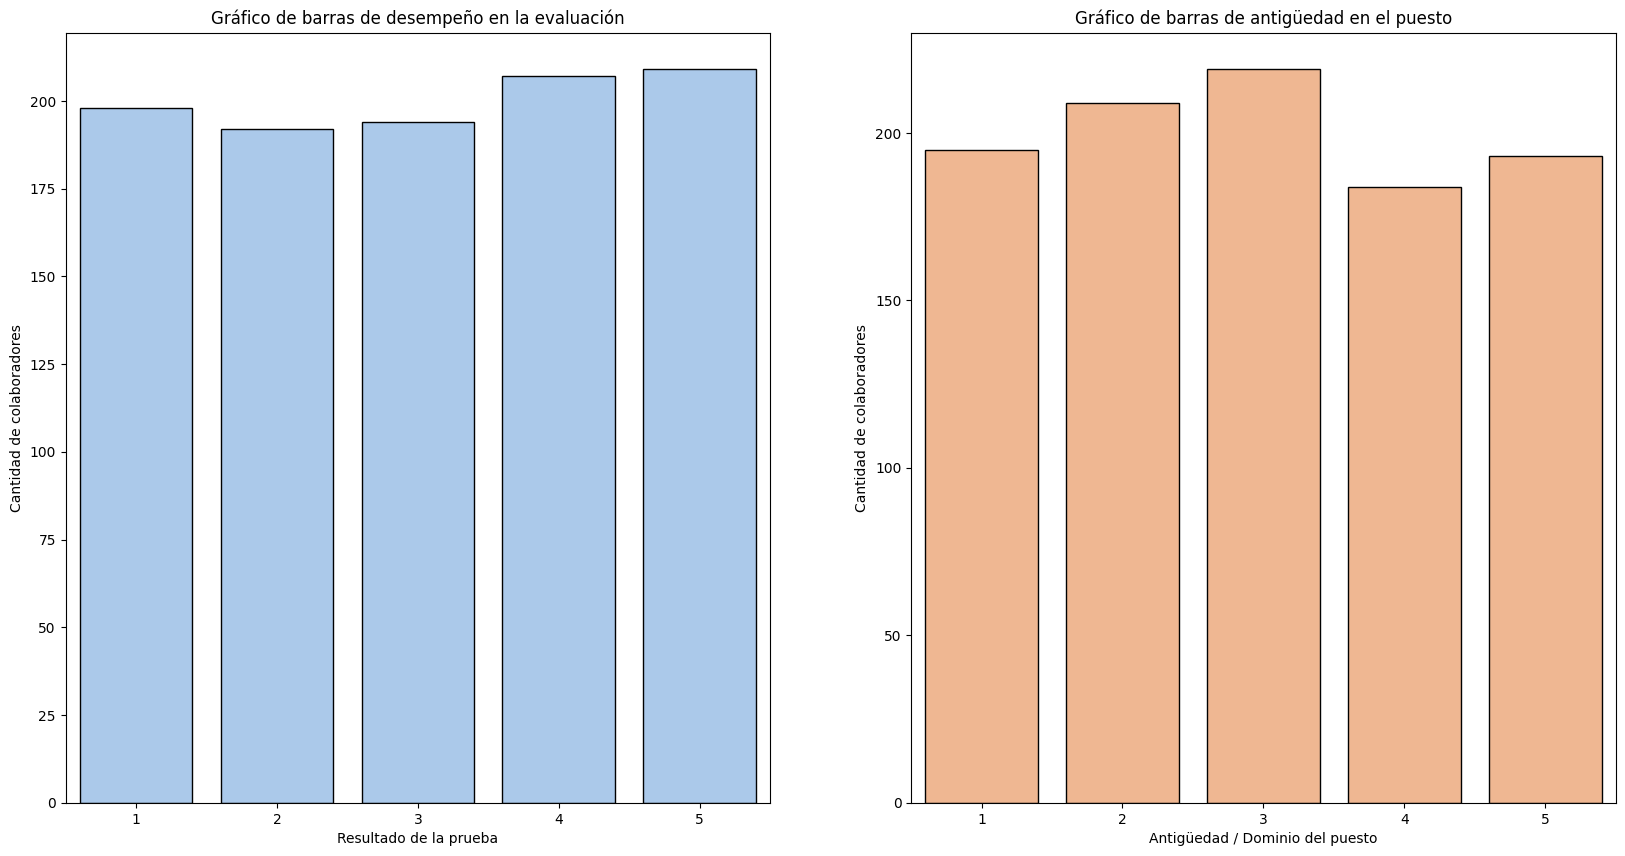

In [17]:
# Características de performance y antiguedad

# Crear subplots para los gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# Graficar los datos como gráficos de barras en cada subplot
sns.countplot(ax=axes[0], data=data, x='perf_eval', color='#a1c9f4', edgecolor='black')
sns.countplot(ax=axes[1], data=data, x='seniority', color='#ffb482', edgecolor='black')

# Configurar los detalles de los subplots
axes[0].set(title='Gráfico de barras de desempeño en la evaluación', xlabel='Resultado de la prueba', ylabel='Cantidad de colaboradores')
axes[1].set(title='Gráfico de barras de antigüedad en el puesto', xlabel='Antigüedad / Dominio del puesto', ylabel='Cantidad de colaboradores')

# Mostrar los subplots
plt.show()



##### Caracteristicas principales de los `departamentos`

Podemos observar uniformidad entre los roles de la empresa en un rango de `192` a `210` colaboradores donde.

Datos a destacar:

- Departamento con mas colaboradores: `Operations`
  
- Departamento con menos colaboradores: `Engineering` 

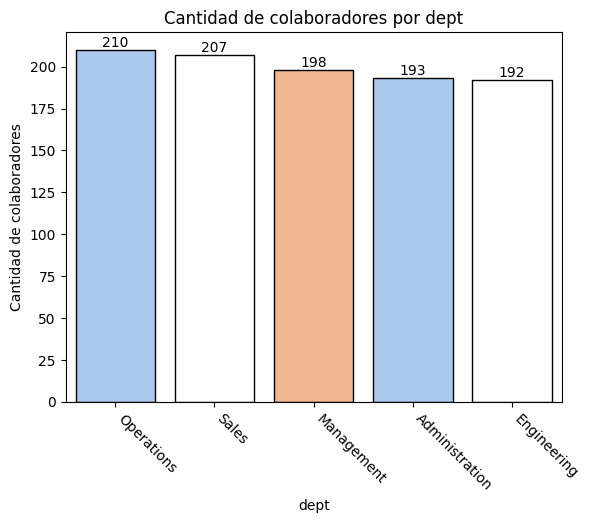

In [18]:
# departamento 

barras('dept',paleta)

## Exploracion bivariada 

Para este apartado vamos a contrastar las variables contrastandolas con otras, tomaremos solo las que consideramos mas importantes como seria el `sueldo`. 

##### Caracteristicas de los `sueldos` por `role de trabajo` 

Podemos destacar que los managers se llevan la delantera en cuanto a suledos considerablemente, asi como que este es el puesto que menos se enceuntra en la empresa, los demas puestos se encuentran en un rango similar.


Otros datos a destacar:

- Solo las personas de TI tienen sueldos con valores atipicos
  
- Titulo con menor salario seria `Marketing Associate` y recordemos que es el puesto que mas se presenta en la empresa


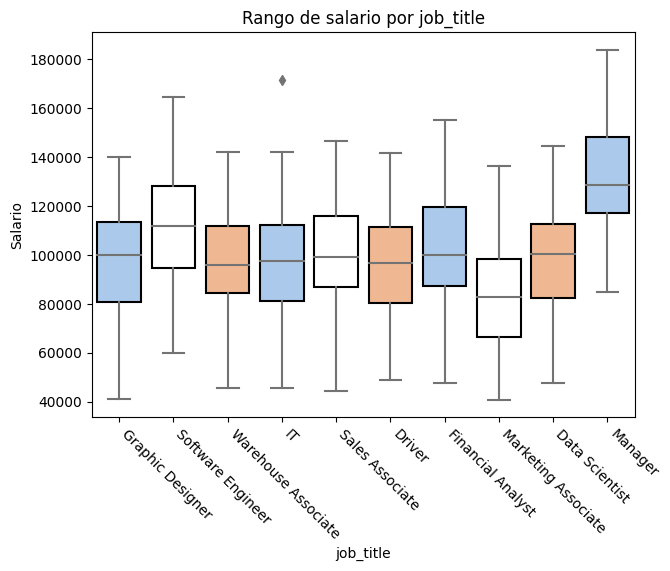

In [19]:
boxp('job_title','total_salary',paleta)

##### Caracteristicas de los `sueldos` por `genero` 

Podemos destacar que los hombres se llevan la delantera en cuanto a suledos aunque muy poco.


Otros datos a destacar:

- El mayor sueldo es de un hombre.
  
- Las mujeres tiene mas valores atipicos.

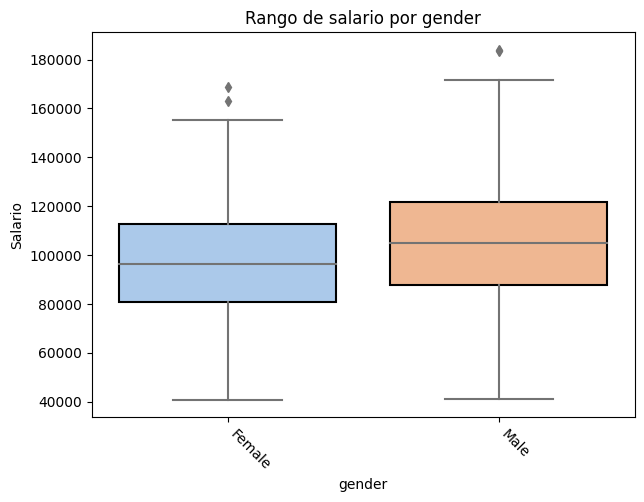

In [20]:
boxp('gender','total_salary',contraste)

##### Caracteristicas de los `sueldos` por `rendimiento de evaluacion` 

Podemos observar como todos los desempeños estan en el mismo rango por lo cual no atribuiria algun cambio en el sueldo al desempeño.


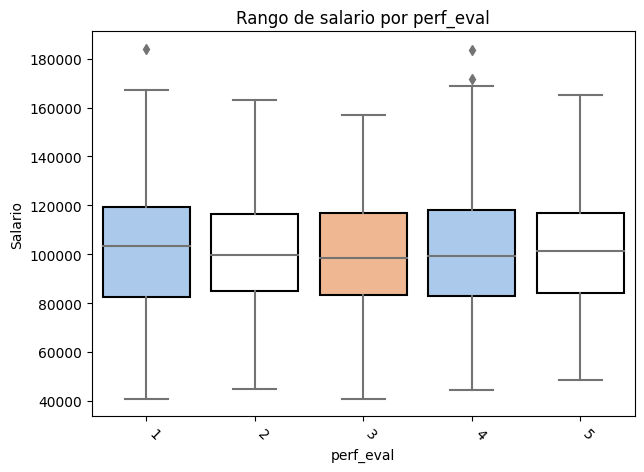

In [21]:
boxp('perf_eval','total_salary',paleta)

##### Caracteristicas de los `sueldos` por `educacion` 

Existe una correlacion positiva respecto a el nivel de educacion, en otras palabras existe una relacion directa entre estudios y sueldo (entre mas estudies mas mas ganaras).

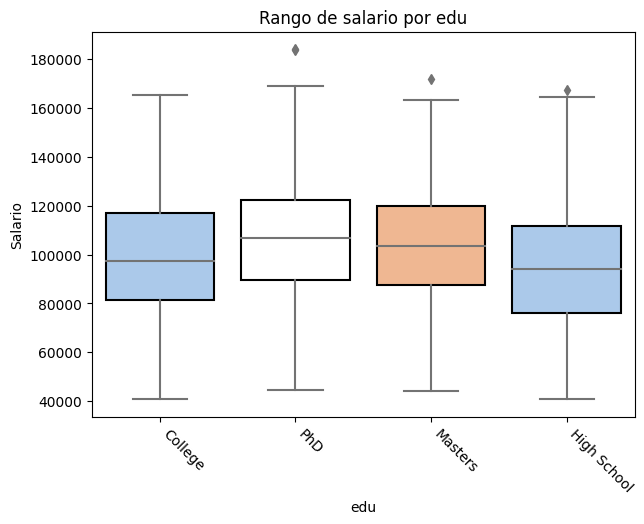

In [22]:
boxp('edu','total_salary',paleta)

##### Caracteristicas de los `sueldos` por `titulo` y por `genero` 

Podemos destacar que:

- Los managers hombres se llevan la delantera en cuanto a suledos considerablemente y las mujeres del area de maerketing son las que cuentan con los salarios mas bajos.
  
- Los ingenieros de Soffware engineer son principalmente hombres.
  
- El puesto de marketing assosiate esta compuesto principalmente por mujeres 



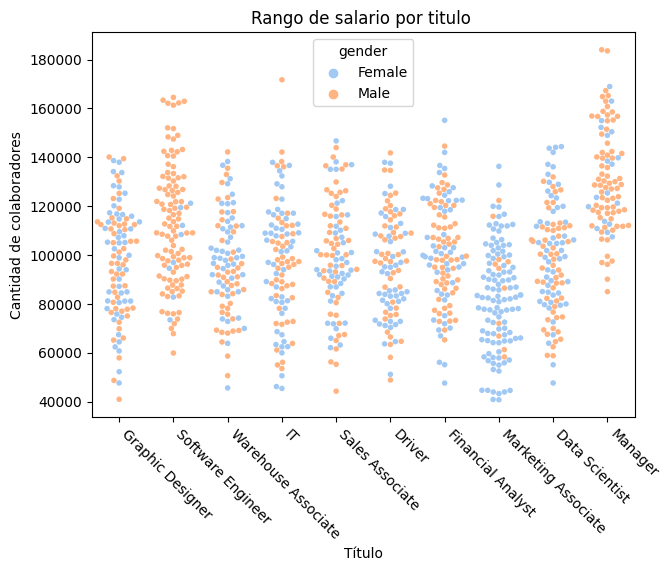

In [23]:
# Draw a categorical scatterplot to show each observation
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.swarmplot(data=data, x="job_title", y="total_salary", hue="gender", size=4,palette=contraste)
ax.set(ylabel="")

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Rango de salario por titulo ")
plt.show()

### Exploracion de correlacion

En este apartado de exporara las diferentes variables numericas y se buscara relacion entrre si.

- Es importantes discriminar las columnas del suledo que repiten infromacion para tener datos claros, y solod ejaremos `toal_salary` ya que contiene toda la informacion que necesitamos.

- Realizaremos un etiquetado cardinal de caracteriticas con la columna `edu` donde asignaremos un valor mayor a un mayor grado de educacion.

In [24]:
### Limpiamos las columnas 

data_encoded = (
    data
    .drop(columns={'total_salary','total_salary_range','age_group'})
)


edu_dict = {'College': 0, 'High School': 1, 'Masters': 2,'PhD': 3}
data_encoded['edu'] = data_encoded['edu'].map(edu_dict)


cmap = LinearSegmentedColormap.from_list('mycmap', paleta)


##### Correlacion entre variables

En este apartado se trabajara con un mapada de calor de correlacion de variables del cual podemos destacar:

1. Respecto a la edad:

   - Existe una `correlacion postiva` respecto a la `edad` y el `sueldo` base lo que significa que una mayor edad generalmente representa un mayor sueldo.
  
   - Existe una `correlacion negativa` respecto a la `edad` y el `bono` base lo que significa que una mayor edad generalmente representa un menor bono.
  
   - La edad no esta relacionada con el nivel de experiencia, el nivel de educacion o el desempeño.
  

2. Respecto a el procentaje de evaluacion:

   - El bonus esta positivamente relacionado con el bonus, entre mas bonus mejor desempeño


3. Respecto a la educacion.
   
   - El nivel de educacion esta ligeramente relacionado positivamente con el sueldo base y entre mejor educacion tengas tendras un mejor sueldo pero no hay un impacto muy grande.


4. Respecto a seniority.
   
   - Las personas con major dominio del trabajo gana mas en bonos pero gana aun mas de salario base.
  
   - No hay relacion entre el dominio del puesto y las otras variables.


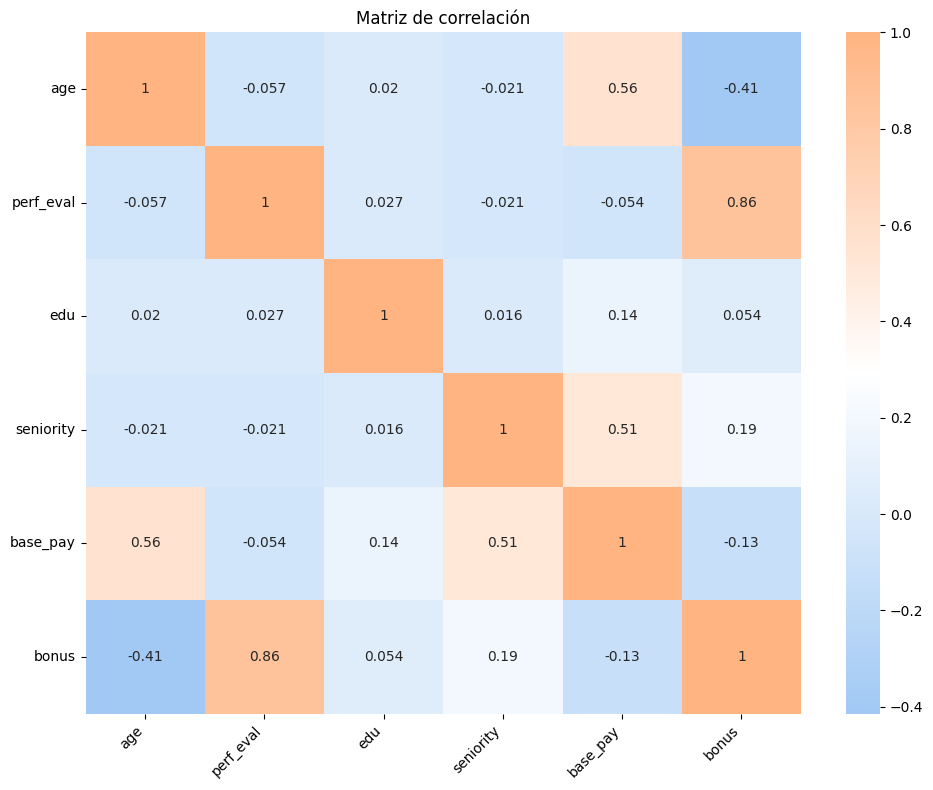

In [25]:
# matriz de correlacion
corr_matrix = data_encoded.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, ax=ax)

plt.title("Matriz de correlación")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 

Con el siguiente grafico podremos observar la mism amatriz pero de una manera mas grafica donde podemos observar respecto a las mentricas explicadas anteriormente 

- Las relaciones entre generos estan distribuidas de manera uniforme.

- Las personas que tienen mejor desempeño y mayor bonus respecto a esto son principalmente hombres.

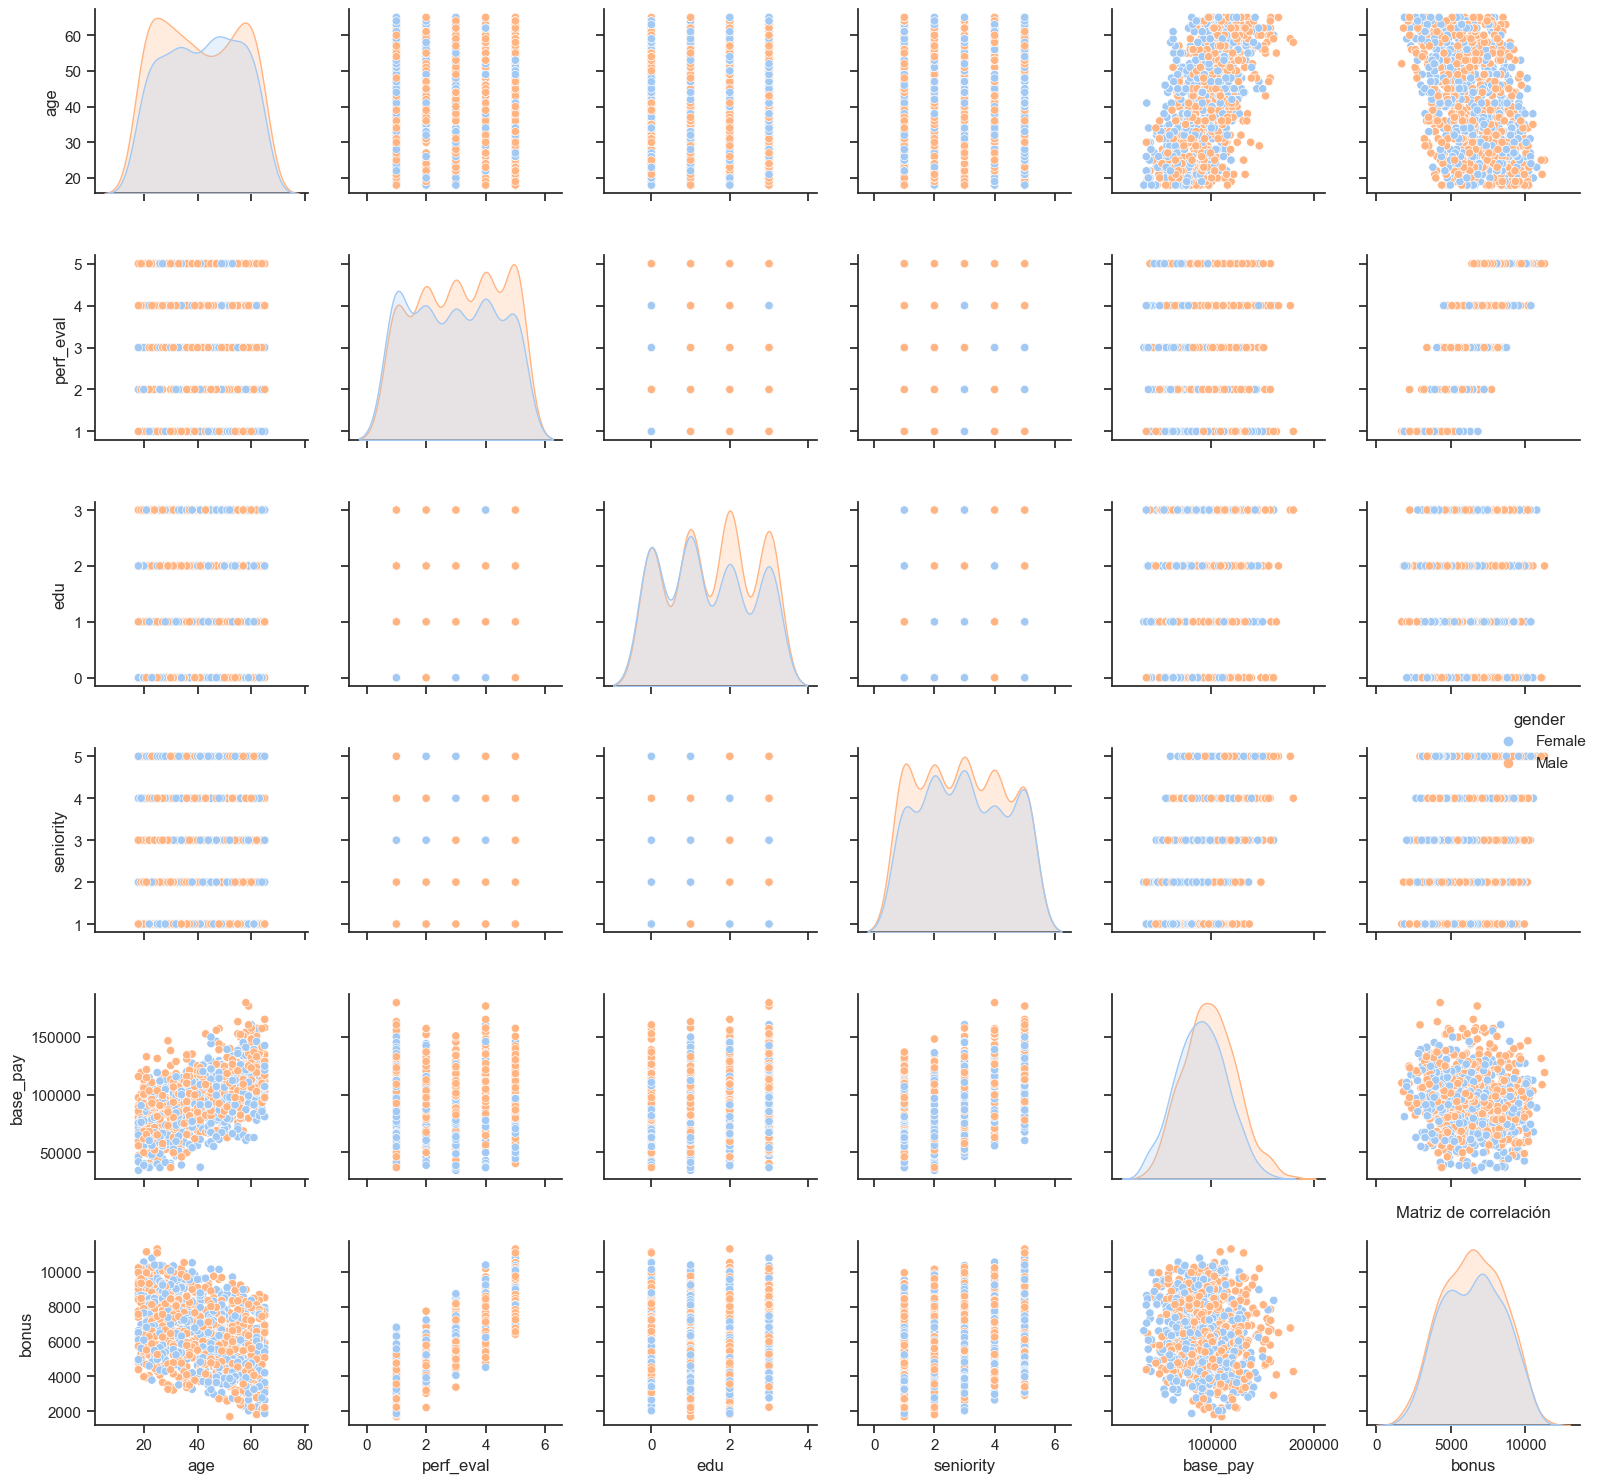

In [26]:

sns.set_theme(style="ticks")
sns.pairplot(data=data_encoded, hue="gender",palette=contraste)
plt.title("Matriz de correlación")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test de hipotesis, en este partado se prepararn principalmente dos hipotesis.


1.  El ingreso promedio de los colaboradores es igual por genero.
2.  El ingreso promedio de los manager es igual por al de los demas colaboradores.

De esta manera podremos concluir de manera acertada y estadistica sobre las hipotesis que presentamos. 

In [27]:
# El ingreso promedio de los manager es igual por al de los demas colaboradores.

managers = data.query('job_title == "Manager"')
others = data.query('job_title != "Manager"')

alpha = 0.05  # el nivel de significancia estadística crítica

results = st.ttest_ind(
    managers['total_salary'], others['total_salary'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, El promedio de ingresos entre puesto difiere")
else:
    print("No rechazamos la hipótesis nula, El promedio de ingresos entre puestos no difiere")

p-value: 7.996394578042696e-27
Rechazamos la hipótesis nula, El promedio de ingresos entre puesto difiere


Un p-value de 7.996394578042696e-27 (notación científica) indica que la probabilidad de obtener un resultado igual o más extremo que el observado bajo la hipótesis nula es extremadamente baja. En términos prácticos, es tan cercana a cero que se considera estadísticamente significativa.

En general, se utiliza un valor de corte para el p-value (llamado nivel de significancia) para decidir si se rechaza o no la hipótesis nula. Si el p-value es menor que el nivel de significancia establecido (comúnmente 0.05 o 0.01), se rechaza la hipótesis nula y se concluye que hay suficiente evidencia para respaldar la hipótesis alternativa.

`En resumen, un p-value muy pequeño, como en este caso, indica una fuerte evidencia en contra de la hipótesis nula y sugiere que existe una relación o diferencia significativa en los datos analizados.`

In [28]:
# El ingreso promedio de los colaboradores es igual por genero.

female = data.query('gender == "Female"')
male = data.query('gender == "Male"')

alpha = 0.05  # el nivel de significancia estadística crítica

results = st.ttest_ind(
    female['total_salary'], male['total_salary'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, El promedio de ingresos entre generos difiere")
else:
    print("No rechazamos la hipótesis nula, El promedio de ingresos entre generos no difiere")

p-value: 7.354185839678807e-08
Rechazamos la hipótesis nula, El promedio de ingresos entre generos difiere


### Conclusiones del EDA

#### Conclusiones generales de el analisis univariado y bivariado de caracteriticas

- Esta empresa probablemente sea un `e-commerce` debido a que cuenta con envios y almacenes pero tiene una gran cantidad de desarrolladores de software y cientificos de datos.

- La empresa esta contituida uniformemente entre todos los departamentos pero podemos destacar personal en maketing y desarrollo de software.

- Los generos se encuentran equilibrados aunque ligeramente hay mas hombres.

- Encontramos todo rango de edades en la empresa desde 18 años hasta 65 años

- Los rangos en los que se encuentran los sueldos base es de `$34,208` a `$17,9726` y los bonos se encontrarian en un rango de `$1,703` a `$11293`.

- La `mayoria` de colaboradores se encuentran en un nivel `mid/medio`.

- Departamento con mas colaboradores: `Operations` y que que menos es `Engineering` 

- Podemos destacar que los managers se llevan la delantera en cuanto a suledos considerablemente, asi como que este es el puesto que menos se enceuntra en la empresa, los demas puestos se encuentran en un rango similar.

- Podemos destacar que los hombres se llevan la delantera en cuanto a suledos aunque muy poco.

- Todas las pruebas de desempeño estan en el mismo rango por lo cual no atribuiria algun cambio en el sueldo al desempeño.

- Existe una correlacion positiva respecto a el nivel de educacion, en otras palabras existe una relacion directa entre estudios y sueldo (entre mas estudies mas mas ganaras).

- Los ingenieros de Software engineer son principalmente hombres.
  
- El puesto de marketing assosiate esta compuesto principalmente por mujeres 



#### Conclusiones generales de la correlacion entre variables

En este apartado se trabajara con un mapada de calor de correlacion de variables del cual podemos destacar:


   - Existe una `correlacion postiva` respecto a la `edad` y el `sueldo` base lo que significa que una mayor edad generalmente representa un mayor sueldo.
  
   - Existe una `correlacion negativa` respecto a la `edad` y el `bono` base lo que significa que una mayor edad generalmente representa un menor bono.
  
   - La edad no esta relacionada con el nivel de experiencia, el nivel de educacion o el desempeño.
  

   - El bonus esta positivamente relacionado con el bonus, entre mas bonus mejor desempeño


   - El nivel de educacion esta ligeramente relacionado positivamente con el sueldo base y entre mejor educacion tengas tendras un mejor sueldo pero no hay un impacto muy grande.

   
   - Las personas con major dominio del trabajo gana mas en bonos pero gana aun mas de salario base.
  
   - No hay relacion entre el dominio del puesto y las otras variables.


#### Conclusiones generales de los test de hipotesis 

- El promedio de ingresos entre generos difiere

- El promedio de ingresos entre puesto difiere respecto a los managers
